# Procesamiento Digital de Audio
## Caleb Rascón
### Separación de Fuentes en Línea

#### NNMF

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from trianglewave import trianglewave
from delay_f import delay_f
from scipy.linalg import pinv

In [12]:
  # Parameters
doa1 = 20 * np.pi / 180  # direction of arrival of first signal
doa2 = -40 * np.pi / 180  # direction of arrival of second signal
amp_out1 = 0.8  # pre-amplification of first signal
amp_out2 = 1.2  # pre-amplification of second signal
d = 4  # distance between microphones in meters
M = 8  # number of microphones
N = 200  # signal size in samples
do_not_delay = 1  # flag to not delay the original signals as part of the microphone model


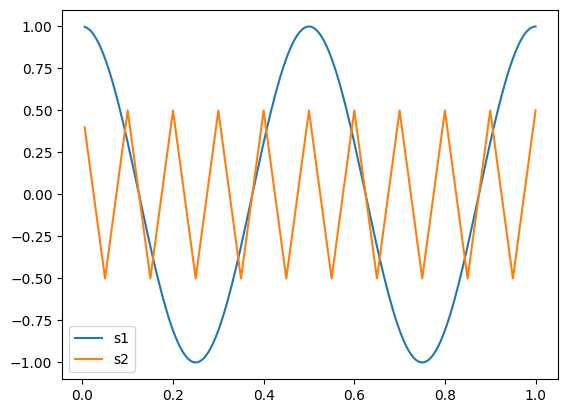

In [13]:

# Simulating signals
t = np.arange(1, N + 1) / N  # time vector (1 second)
c = 343  # speed of sound
fs = N  # sampling frequency same as signal size (1 second)

# Original signals
s1 = np.cos(2 * np.pi * 2 * t)
s2 = trianglewave(10, N) * 0.5

# Microphones (input signals)
X = np.zeros((M, N))
X[0, :] = s1 + s2
for m in range(1, M):
    if do_not_delay == 1:
        X[m, :] = s1 * amp_out1 + s2 * amp_out2
    else:
        X[m, :] = delay_f(s1, (m * d / c) * np.sin(doa1), N) + delay_f(s2, (m * d / c) * np.sin(doa2), N)

plt.plot(t, s1, label='s1')
plt.plot(t, s2, label='s2')
plt.legend()
plt.show()

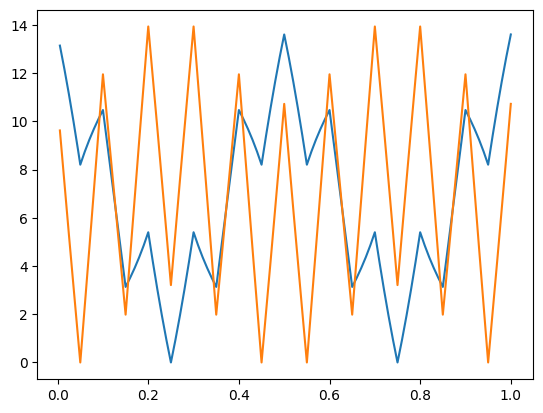

In [16]:

# Doing NNMF
# X should only have positive values
X -= np.min(X)

# Initialize loop variables
np.random.seed(0)
o = 2 * np.random.rand(2, N)
W = 2 * np.random.rand(2, M)

err = np.inf

its = 0
maxIters = 5000

while err > np.finfo(float).eps and its < maxIters:
    its += 1

    W = np.dot(np.dot(X, o.T), pinv(np.dot(o, o.T)))
    W[W < 0] = 0

    o = np.dot(pinv(np.dot(W.T, W)), np.dot(W.T, X))
    o[o < 0] = 0

    X_est = np.dot(W, o)

    err = np.mean(np.sqrt(np.sum((X - X_est) ** 2)))

plt.plot(t, o.T)
plt.show()
